## crop and fertilizer Recommendation System using ML

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

ModuleNotFoundError: No module named 'sklearn'

In [7]:
# Loading the dataset
crop = pd.read_csv(r"database/crop_recommendation.csv")

In [8]:
# Set visualization styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

In [9]:
print("First 5 rows of the dataset:")
crop.head()

First 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
print("\nLast 5 rows of the dataset:")
crop.tail()


Last 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [11]:
print("\nShape of the dataset:")
crop.shape


Shape of the dataset:


(2200, 8)

In [12]:
print("\nInfo about the dataset:")
crop.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
# to check the missing values
print("\nMissing values in the dataset:")
crop.isnull().sum()


Missing values in the dataset:


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [30]:
# to check dublicate values
duplicates = crop.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicates}")
crop.duplicated().sum()



Number of duplicate rows in the dataset: 0


np.int64(0)

In [16]:
# to check the statistics of dataset
print("\nStatistical summary of the dataset:")
print(crop.describe())



Statistical summary of the dataset:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298

In [31]:
print("\nColumns in the dataset:")
crop.columns


Columns in the dataset:


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [34]:
# check the target feature distribution
print("\nDistribution of target labels:")
crop['label'].value_counts()



Distribution of target labels:


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


Distribution of crop labels:


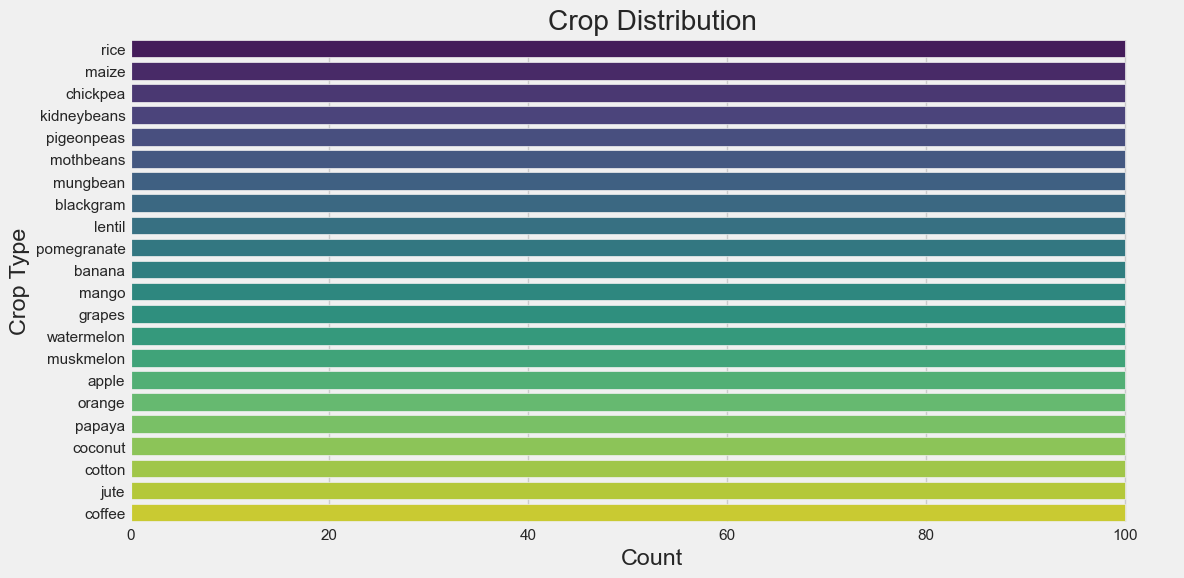

In [37]:
# Visualize target feature distribution
print("\nDistribution of crop labels:")
plt.figure(figsize=(12, 6))
sns.countplot(
    y='label',
    data=crop,
    order=crop['label'].value_counts().index,
    hue='label',  # Assign `label` to hue
    dodge=False,  # To avoid splitting the bars
    palette="viridis",
    legend=False
)
plt.title("Crop Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()



Creating a pairplot for numerical features (may take time for large datasets)...


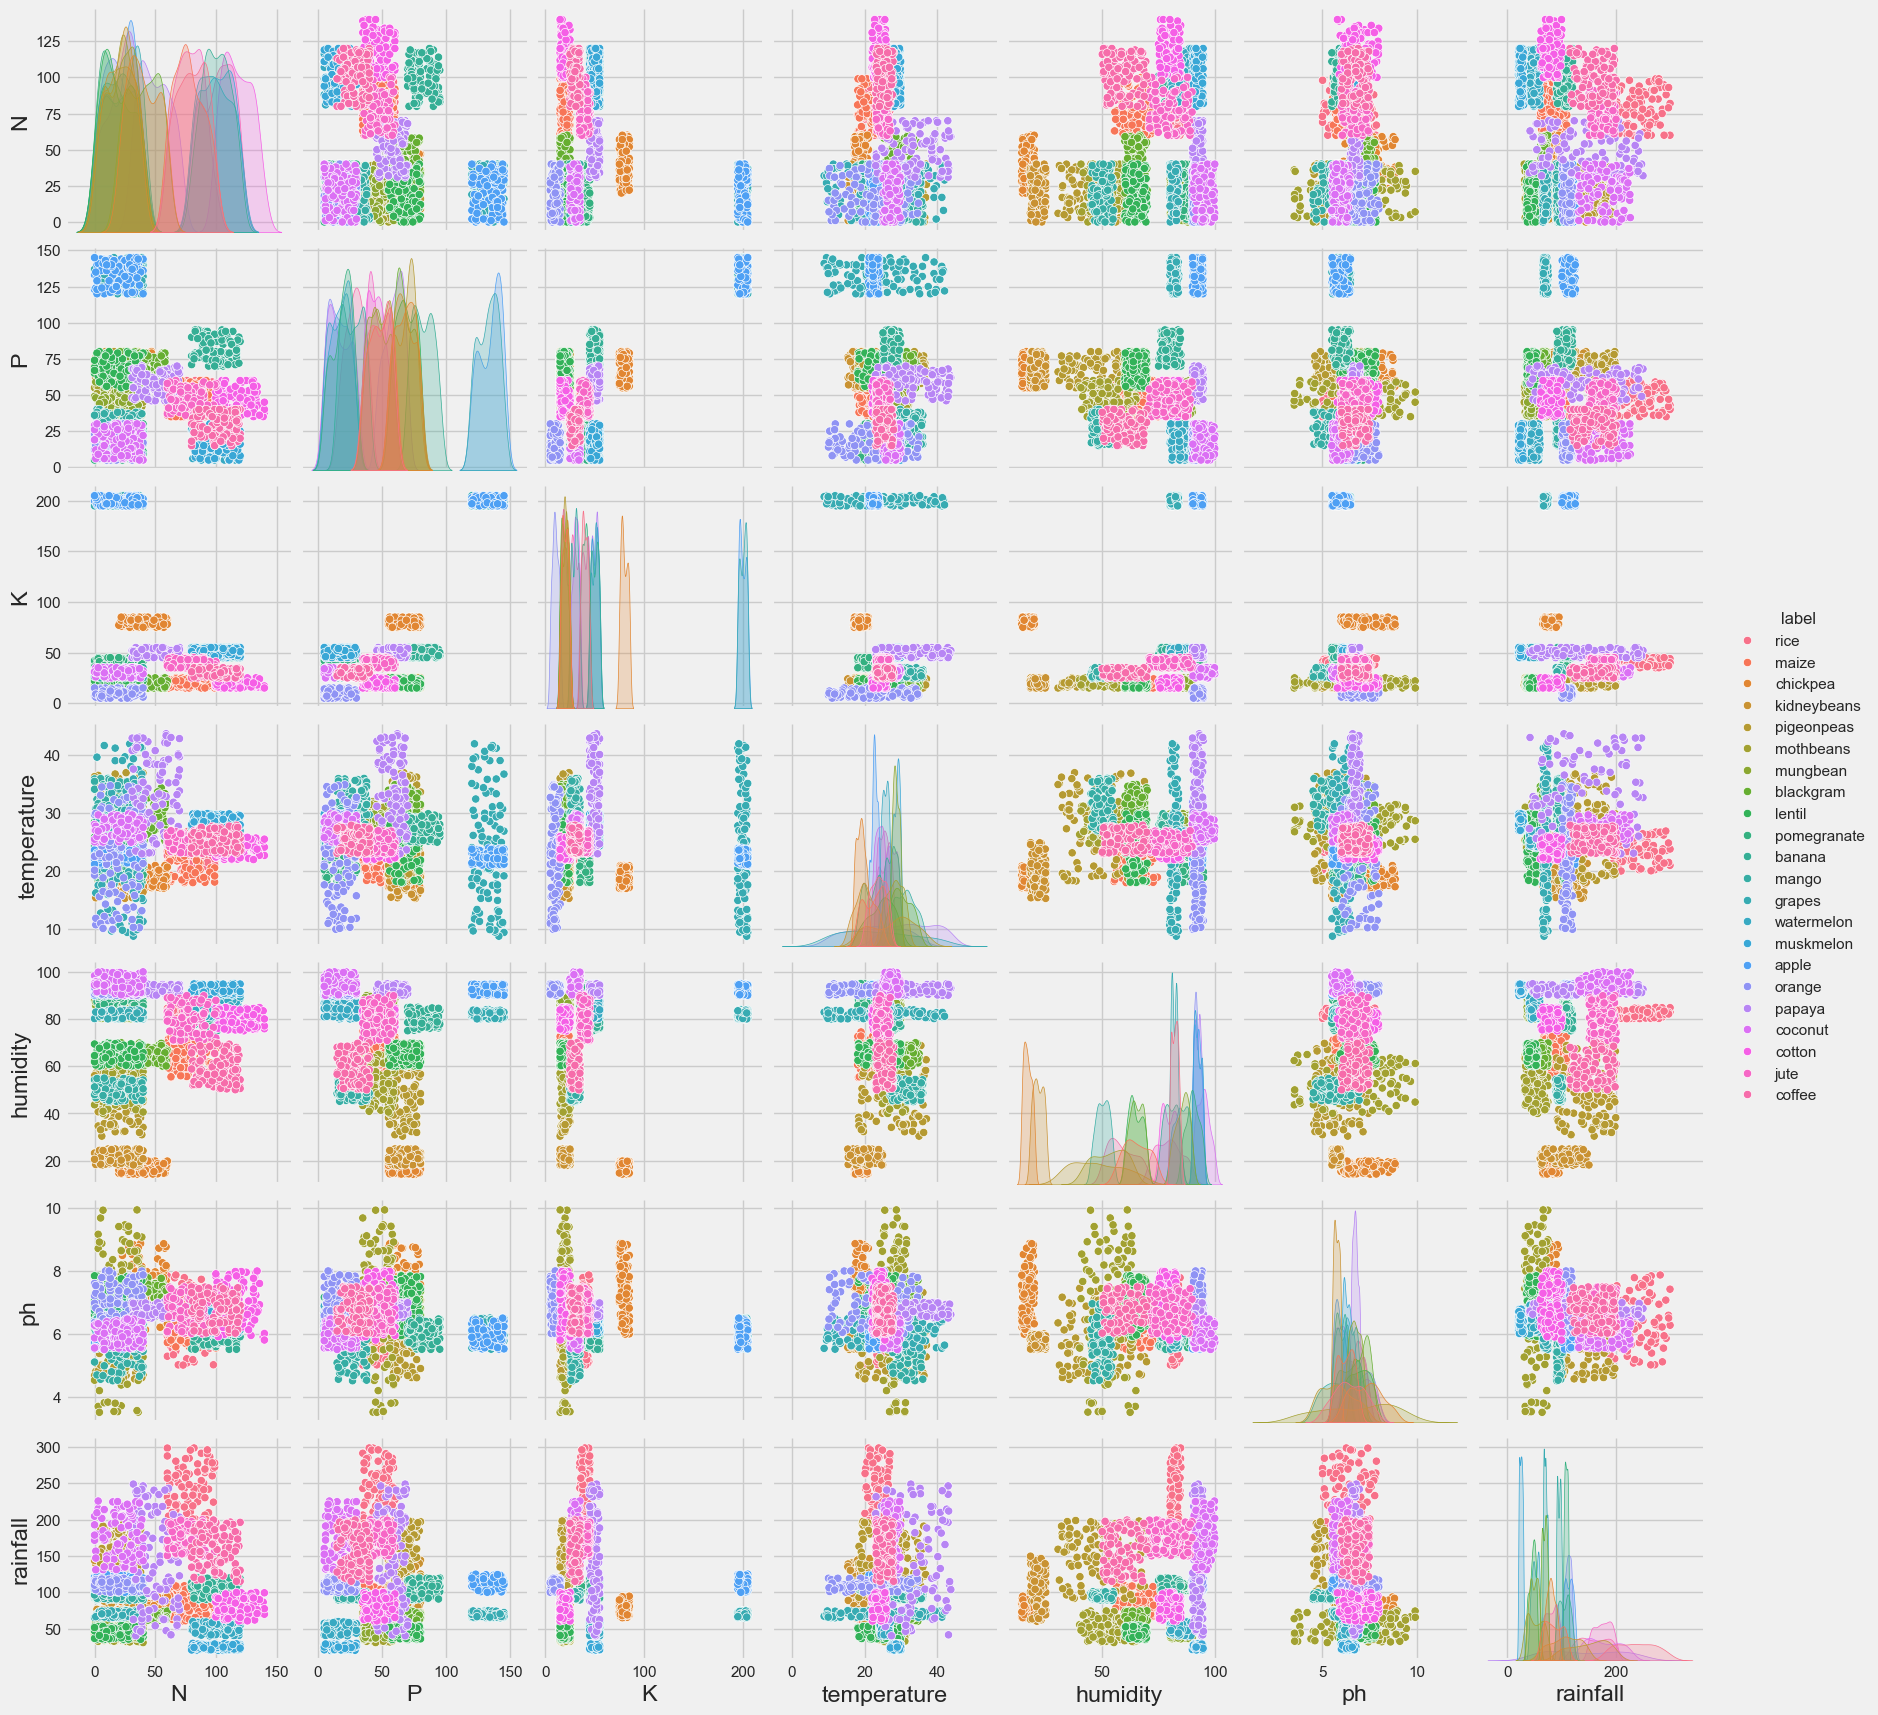

In [38]:
# Pairplot for numerical features
print("\nCreating a pairplot for numerical features (may take time for large datasets)...")
sns.pairplot(crop, hue='label', diag_kind='kde', palette="husl")
plt.show()

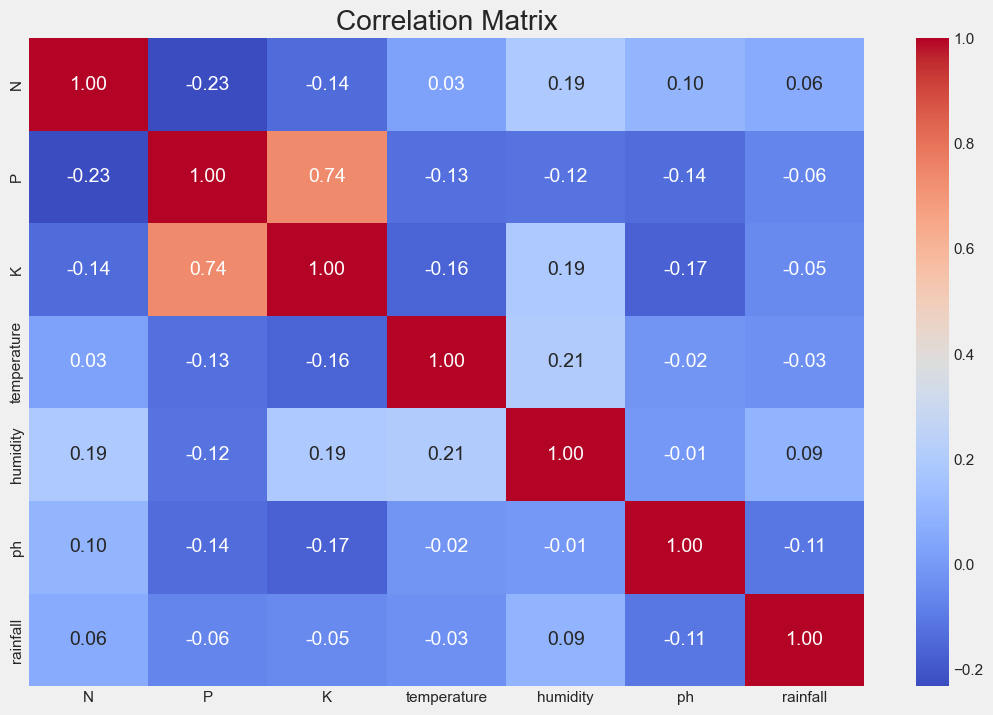

In [40]:
# Correlation heatmap (only for numeric columns)
plt.figure(figsize=(12, 8))
numeric_data = crop.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


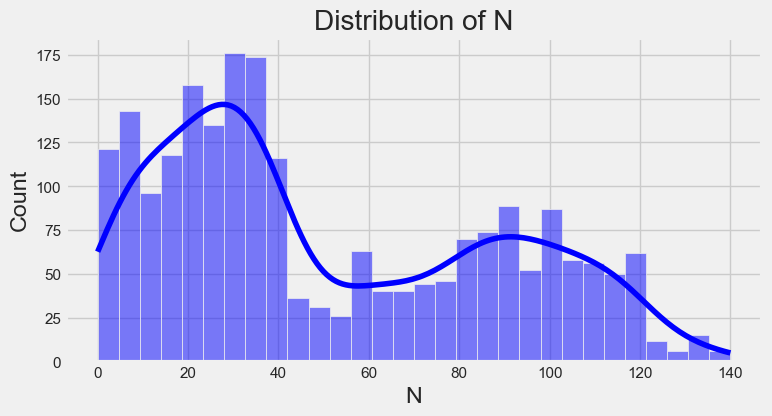

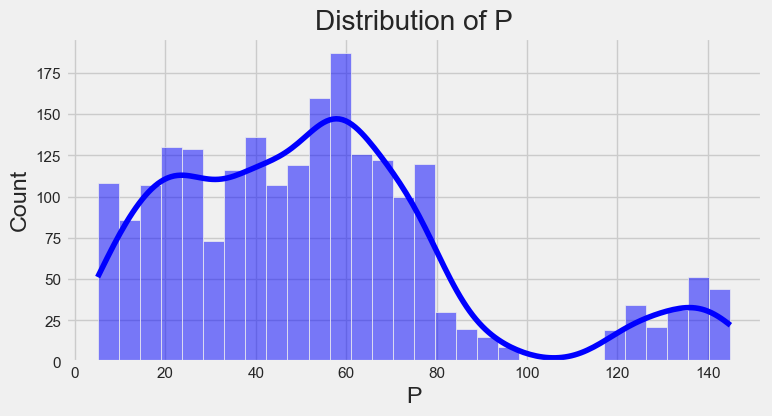

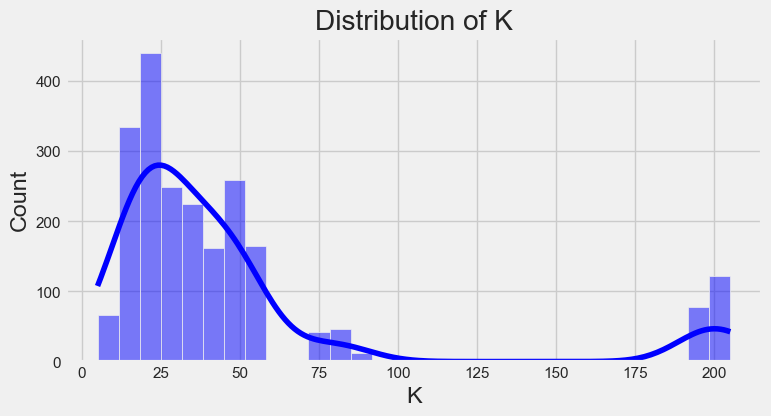

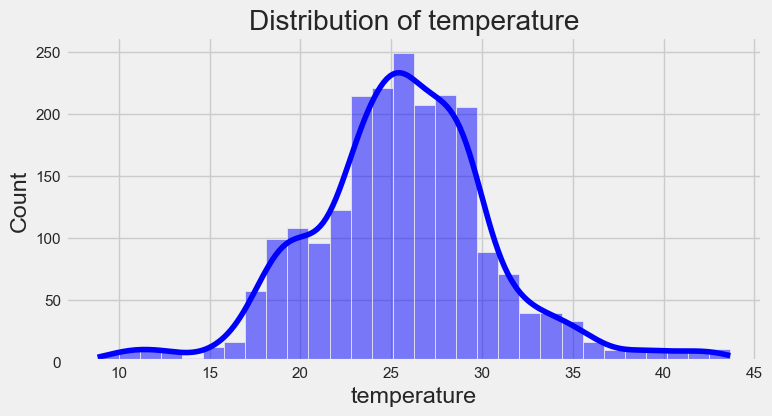

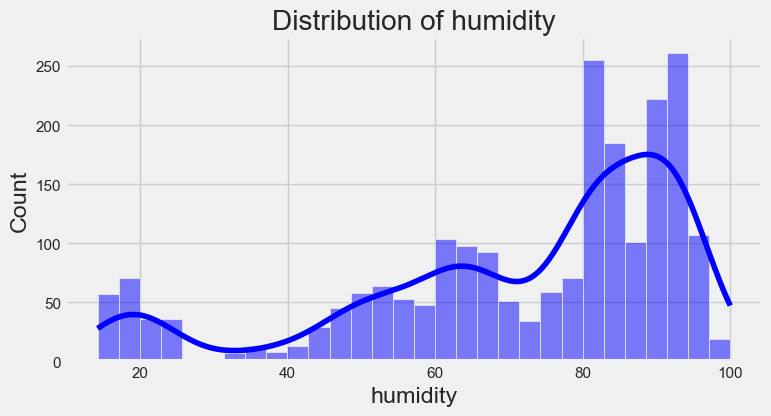

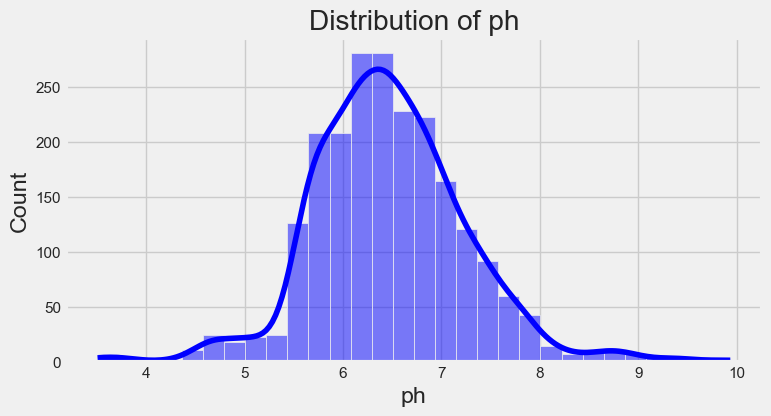

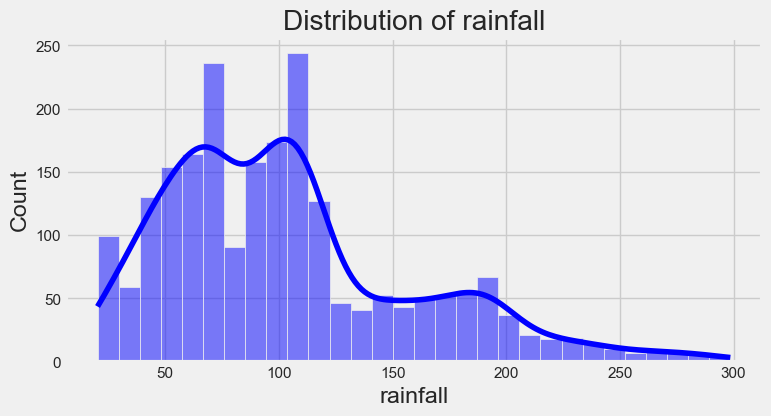

In [42]:
# Feature distributions
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(crop[feature], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

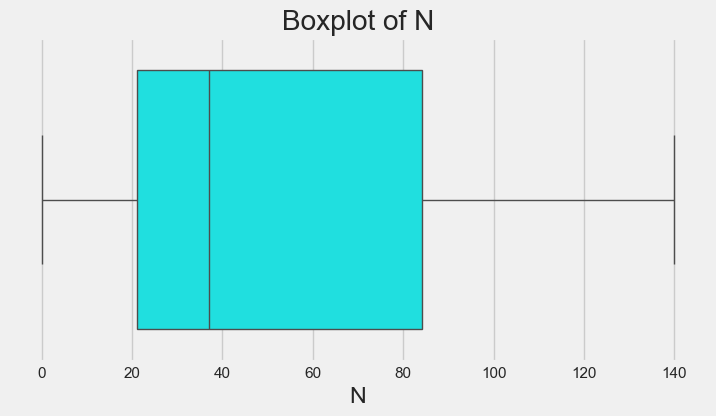

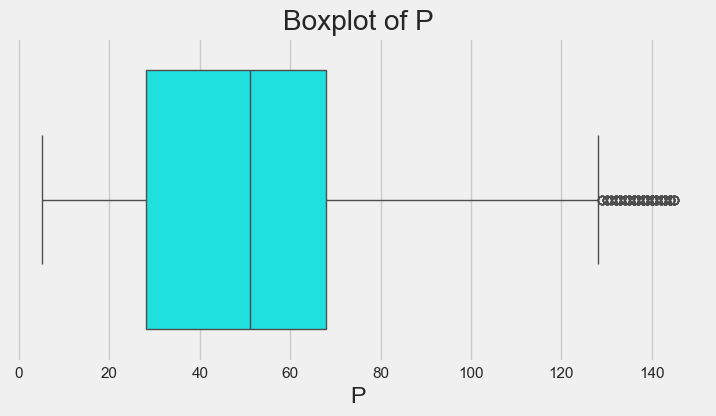

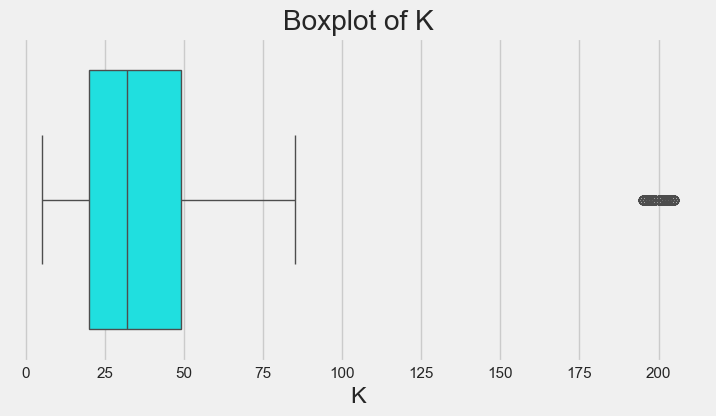

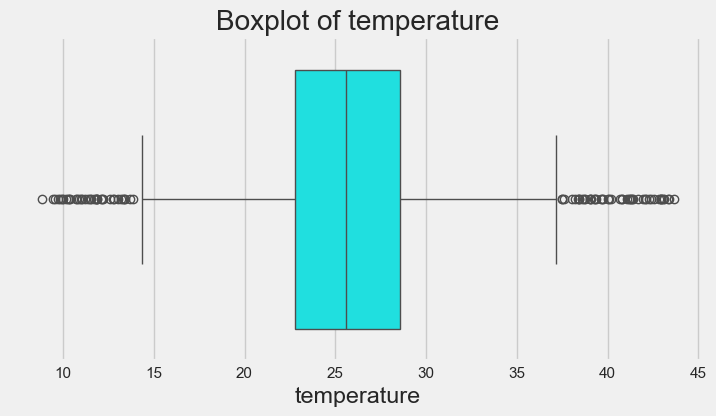

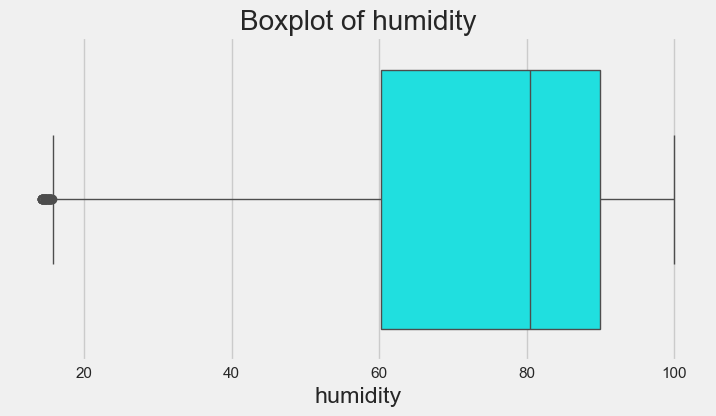

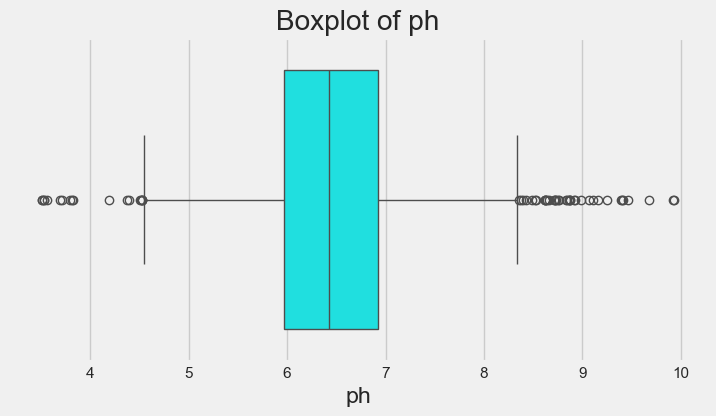

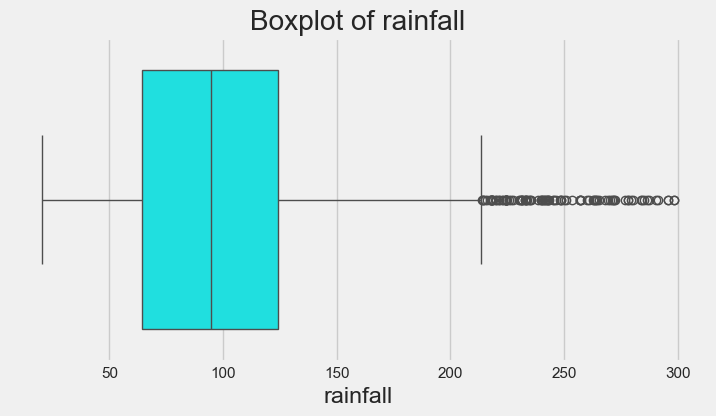

In [43]:
# Boxplot for outlier detection
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=crop[feature], color="cyan")
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()
